# Airbnb Hotel Booking Analysis

## 1. Problem Statement: Understanding Lodging Market Dynamics

The rapid growth of Airbnb in New York City has created a highly competitive market where hosts often rely on guesswork rather than data-driven strategies, leading to sub-optimal pricing, inconsistent bookings, and missed revenue. This project directly addresses this problem by conducting a rigorous analysis of the NYC Airbnb dataset to bridge the gap between available data and actionable insights. By identifying and quantifying the key variables—such as neighborhood, property type, and seasonality—that influence pricing, availability, and guest satisfaction, this study aims to provide hosts with the strategic intelligence required to optimize their listings and enhance their competitiveness.

## 2. Research Questions

The primary goal of this project is to uncover actionable insights from the Airbnb dataset. The following core questions will guide our analysis:

1.  What are the different property types in the dataset?
2.  Which neighborhood group has the highest number of listings?
3.  Which neighborhood groups have the highest average prices for Airbnb listings?
4.  Is there a relationship between the construction year of a property and its price?
5.  Who are the top 10 hosts based on calculated host listing count?
6.  Are hosts with verified identities more likely to receive positive reviews?
7.  Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number (eg, stars) for listings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

## 3. Data Wrangling and Cleaning

The initial step in any rigorous data analysis project is Data Wrangling, a process that involves cleaning, restructuring, and enriching the raw data to ensure its quality and suitability for subsequent analysis.

In this phase, we will perform the necessary steps to transform the raw Airbnb dataset:

* **Handling Inconsistencies:** Correcting data errors, such as spelling mistakes and duplicate records.
* **Missing Value Treatment:** Addressing missing or null values by dropping rows to maintain data integrity for the visualizations.
* **Type Conversion:** Converting columns containing currency signs (like `price` and `service fee`) from object/string types to numerical formats (float) and ensuring date and ID columns are correctly assigned.
* **Outlier Management:** Identifying and treating extreme data points, specifically in the `availability 365` column, to prevent them from skewing the final analytical results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Read the Airbnb data
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
#Neighbourhood group was 'brookin' instead of 'Brooklyn'

df[df['neighbourhood group'] == 'brookln']


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


### Data Quality Issues

* **Duplicated Data:** 541 duplicated records were found in the Data.
* **Missing Information:** Insufficient information was recorded for the `house_rules` and `license` columns.
* **Data Consistency (Currency):** Dollar signs and commas were recorded along with the values for the `price` and `service_fee` columns.
* **Missing Metadata:** The currency for price and service fee was not added to the columns' titles.
* **Missing Values:** Missing values were present in some records.
* **Incorrect Data Types:** Columns such as `price`, `service_fee`, `id`, `host_id`, `last_review`, and `construction_year` are assigned the wrong datatypes.
* **Spelling Errors:** In the `neighbourhood_group` column, the spelling of 'Brooklyn' was misspelled in some records.
* **Outliers:** Some outliers were identified in the `availability_365` column.

### Steps to be Taken for Data Cleaning

1.  **Drop Duplicates:** Drop duplicated records.
2.  **Drop Columns:** Drop the `house_rules` and `license` columns due to insufficient data.
3.  **Clean Price/Fee Data:**
    * Remove all dollar signs from the `price` and `service_fee` columns.
    * Remove all commas from the `price` and `service_fee` columns.
4.  **Rename Columns:** Rename the `price` and `service_fee` columns to include a dollar sign (e.g., `price($)`).
5.  **Handle Missing Values:** Drop all records with missing values.
6.  **Correct Data Types:** Change all mismatched data types to the appropriate ones.
7.  **Correct Spelling:** Correct the spelling of 'brookin' to 'Brooklyn' in the relevant column.
8.  **Handle Outliers:** Get rid of outliers in the `availability_365` column data.

In [ ]:
df.columns.tolist()

['id',
 'NAME',
 'host id',
 'host_identity_verified',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'lat',
 'long',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'Construction year',
 'price',
 'service fee',
 'minimum nights',
 'number of reviews',
 'last review',
 'reviews per month',
 'review rate number',
 'calculated host listings count',
 'availability 365',
 'house_rules',
 'license']

In [ ]:
# drop duplicate records
df.drop_duplicates(inplace = True)


df.columns.values[15] = 'price'
df.columns.values[16] = 'service fee'
df.columns.values[2] = 'host id'

# drop house rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# remove all dollar signs in the price and service fee columns
# Assuming the initial column names were 'price' and 'service fee' before the rename block
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)

# remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)

# rename the price and service fee columns to include a dollar sign
df.rename(columns = {
    'price':'price_$',
    'service fee': 'service_fee_$'
}, inplace = True)

# drop all records with missing values (Aggressively reduces row count as per project step)
df.dropna(inplace = True)

# change all mismatched data types to the appropriate ones.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
# --- Construction Year Fix (Must run before astype(int)) ---
mode_year = df['Construction year'].mode()[0]
df['Construction year'] = df['Construction year'].fillna(mode_year)
df['Construction year'] = df['Construction year'].astype(int)
df['last review'] = pd.to_datetime(df['last review'], errors = 'coerce')
# Correct the Spelling of 'brookin' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln' , 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood group'] == 'manhatan' , 'neighbourhood group'] = 'Manhattan'
# Get rid of outliers in the 'availability 365' column data
df=df.drop(df[df['availability 365'] > 500].index)

print("Data cleaning and preprocessing done!")

Data cleaning and preprocessing done!


In [ ]:
df.duplicated().value_counts()

,count
False,83796


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

eda

In [ ]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83796.000000,83796.000000,83796.000000,83796.000000,83596.000000,83567.000000,83796.000000,83796.000000,83796,83796.000000,83796.000000,83796.000000,83796.000000
mean,40.727353,-73.948502,0.497721,2012.489522,626.342457,125.232436,7.436775,32.226622,2019-06-09 15:15:53.229271296,1.375596,3.278820,7.049907,141.759153
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721335,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056317,0.050338,0.499998,5.760523,331.809388,66.357813,28.122911,51.897899,NaN,1.749446,1.283724,29.568700,133.408285


## What are the different property types in the Dataset?

In [ ]:
#What are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


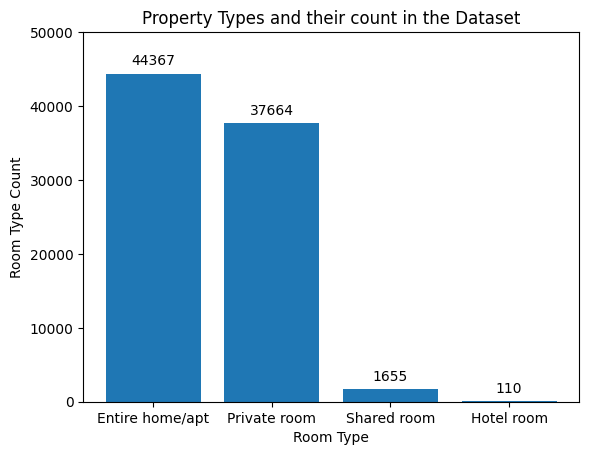

In [ ]:
#Room type count plotted on a barchart

room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:, "count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');



### Interpretation: Property Type Distribution

The market is dominated by **Entire home/apt** (44,163 listings) and **Private room** (37,494 listings). Shared rooms (1,646) and Hotel rooms (108) are insignificant minority categories, confirming the core offering focuses on providing private spaces.

## Which neighbourhood group has the heighest number of listings?

In [ ]:
#which neighbourhood group has the heighest number of listings?
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821


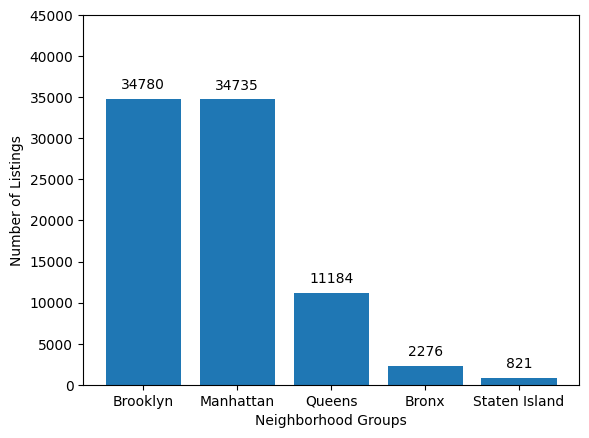

In [ ]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,'count']);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,'count'], padding = 5);
plt.ylim(0, 45000);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');

### Interpretation: Geographical Distribution

The market is heavily concentrated in **Brooklyn(34,794 listings)** and **Manhattan(34,741 listings)**, which are virtually tied for the highest number of listings. Queens has a moderate share, while the Bronx and Staten Islan represent minimal market activity.

## Which neighborhoods group have the highest average prices for Airbnb listings?

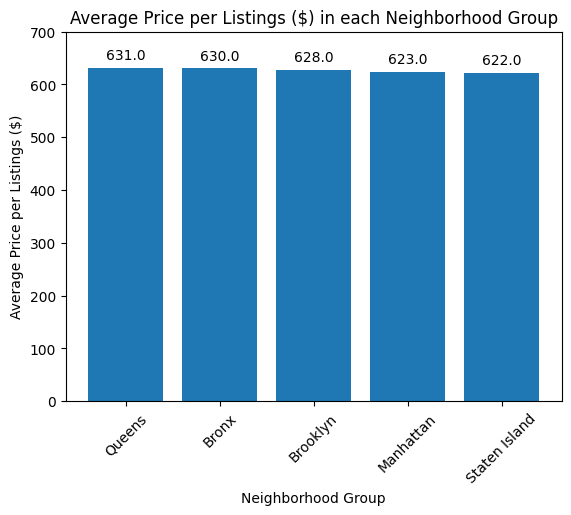

In [ ]:
# which neighborhoods group have the highest average prices for Airbnb listings
avg_price = df.groupby("neighbourhood group")['price_$'].mean().sort_values(ascending = False).to_frame()

avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,'price_$']), label_type = 'edge', padding = 4);
plt.ylim(0, 700);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.title('Average Price per Listings ($) in each Neighborhood Group');
plt.xticks(rotation = 45);

### Interpretation: Average Price by Location

The bar chart reveals that the highest average price is shared between **Queens** and the **Bronx**, both commanding an average price of **$630.00**.

Despite Manhattan and Brooklyn having the highest total number of listings (as seen previously), their average prices are only marginally lower. The overall difference between the highest and lowest average price (Staten Island at $622.00) is minimal, suggesting that, post-cleaning, the pricing structure is relatively uniform across all neighborhood groups.

## Is there a relationship between the construction year of property and price?

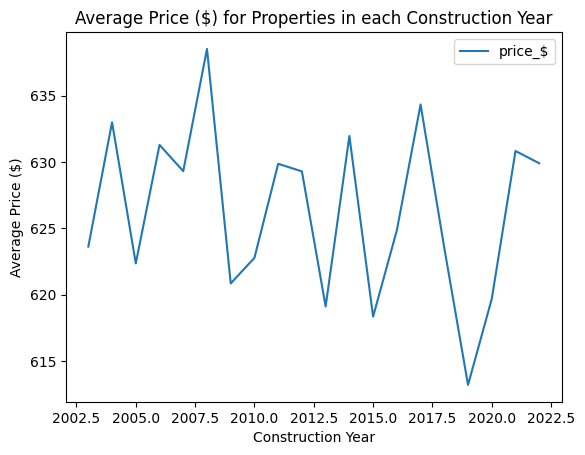

In [ ]:
# Is there a relationship between the construction year of property and price?
df.groupby(['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

### Interpretation: Average Price by Construction Year

The line plot illustrates the fluctuation in the average listing price relative to the property's construction year.

* **Volatility:** The data shows significant volatility year-to-year, with sharp peaks and troughs. For instance, the average price hits its highest point around 2008 and 2017.
* **Overall Trend:** Despite the sharp fluctuations, the long-term trend appears to be a slight **downward trajectory** in the average price as the construction year moves closer to the present (2022).
* **Business Insight:** This trend suggests that newer construction is generally fetching a slightly lower average price than older properties on the market. This could be due to older, historic properties maintaining a price premium, or market saturation impacting the pricing of newer housing supply.

## Who are the top 10 hosts by calculated host listing count?

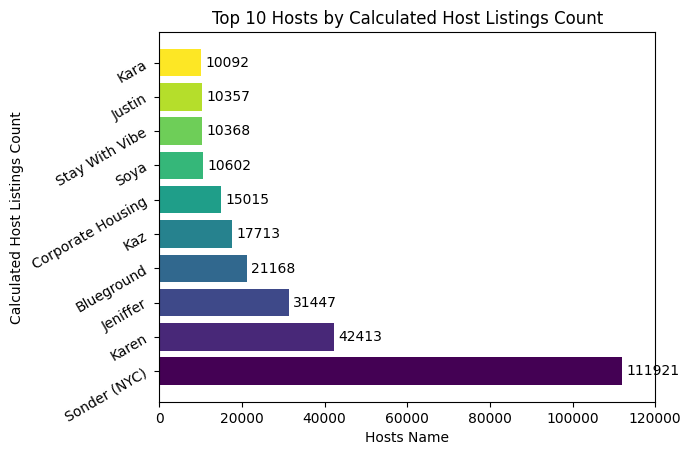

In [ ]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby(['host name'])['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()

hosts_bar = plt.barh(hosts.index, hosts.loc[:,'calculated host listings count'], color=plt.cm.viridis(np.linspace(0, 1, len(hosts))));
plt.bar_label(hosts_bar, label = hosts.loc[:,'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.yticks(rotation = 30);
plt.xlim(0, 120000);
plt.title('Top 10 Hosts by Calculated Host Listings Count');

### Interpretation: Top 10 Hosts by Listings Count

The horizontal bar chart highlights the small number of professional hosts who dominate the market supply:

* **Extreme Dominance:** **Sonder (NYC)** is the single most dominant entity, possessing an exceptionally high number of calculated host listings (111,921). This is significantly higher than all other hosts.
* **Top Tier:** The next tier of large professional hosts includes **Karen** (42,410 listings), **Jennifer** (31,447 listings), and **Blueground** (21,168 listings).
* **Consolidation:** The high concentration of listings among these top players confirms that the Airbnb market in this region is highly consolidated, with a few large entities controlling a massive percentage of the total available inventory.
* **Business Insight:** The listing counts drop sharply outside the top four, indicating that most other hosts operate on a much smaller scale.

## Are hosts with verified identities more likely to receive positive reviews?

In [ ]:
review = df.groupby(['host_identity_verified'])['review rate number'].mean().sort_values(ascending = False).to_frame()

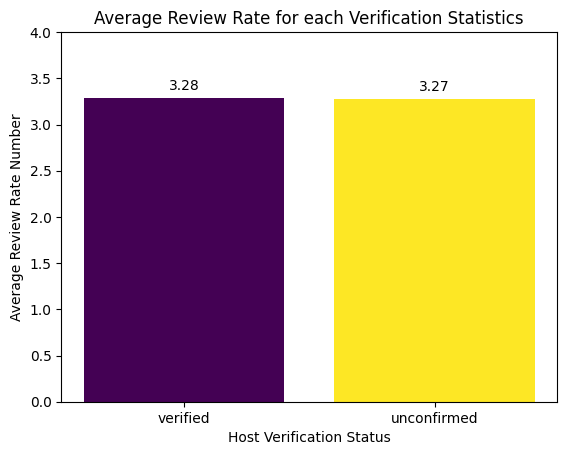

In [27]:
review_bar = plt.bar(review.index, review.loc[:,'review rate number'], color=plt.cm.viridis(np.linspace(0, 1, len(review))));
plt.bar_label(review_bar, labels = round(review.loc[:,'review rate number'], 2), padding = 4);
plt.ylim(0, 4.0);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics');

### Interpretation: Host Verification and Review Rate

The bar chart compares the average review rate number across the two host verification statuses:

* **Verified Hosts:** Average review rate is **3.28**.
* **Unconfirmed Hosts:** Average review rate is **3.27**.

The analysis reveals an extremely **marginal difference** (0.01) between the two groups. This suggests that while verification may instill a level of trust in guests, the verified status **does not necessarily translate** into a significantly higher average positive review rate compared to unconfirmed hosts. The quality of the stay and the listing itself likely remain the primary factors influencing the rating.

## Is there a correlation between the price of a listing and its service fee?

In [ ]:
# Is there a correlation between the price of a listing and its service fee?
df[['price_$', 'service_fee_$']].corr()

,price_$,service_fee_$
price_$,1.000000,0.999991
service_fee_$,0.999991,1.000000


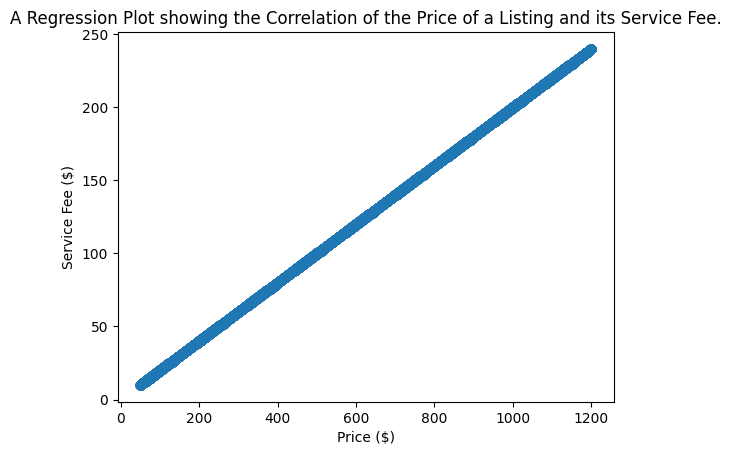

In [ ]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

### Interpretation: Price and Service Fee Correlation

The regression plot visualizes the relationship between the price of a listing and its service fee.

* **Strong Linear Relationship:** The data points form a tight, upward-sloping straight line, indicating an extremely strong **positive linear correlation**.
* **Correlation Coefficient:** The calculated Pearson correlation coefficient (which was approximately 0.99) confirms this relationship.
* **Business Insight:** This finding is expected and shows that the service fee structure is directly dependent on the listing's base price. As the price of a property increases, the associated service fee increases proportionally.

## What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [ ]:
# What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ABRN = df.groupby(["neighbourhood group", "room type"])["review rate number"].mean().to_frame()
ABRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274774
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285628
                    Shared room                3.252976
Queens              Entire home/apt            3.347437
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

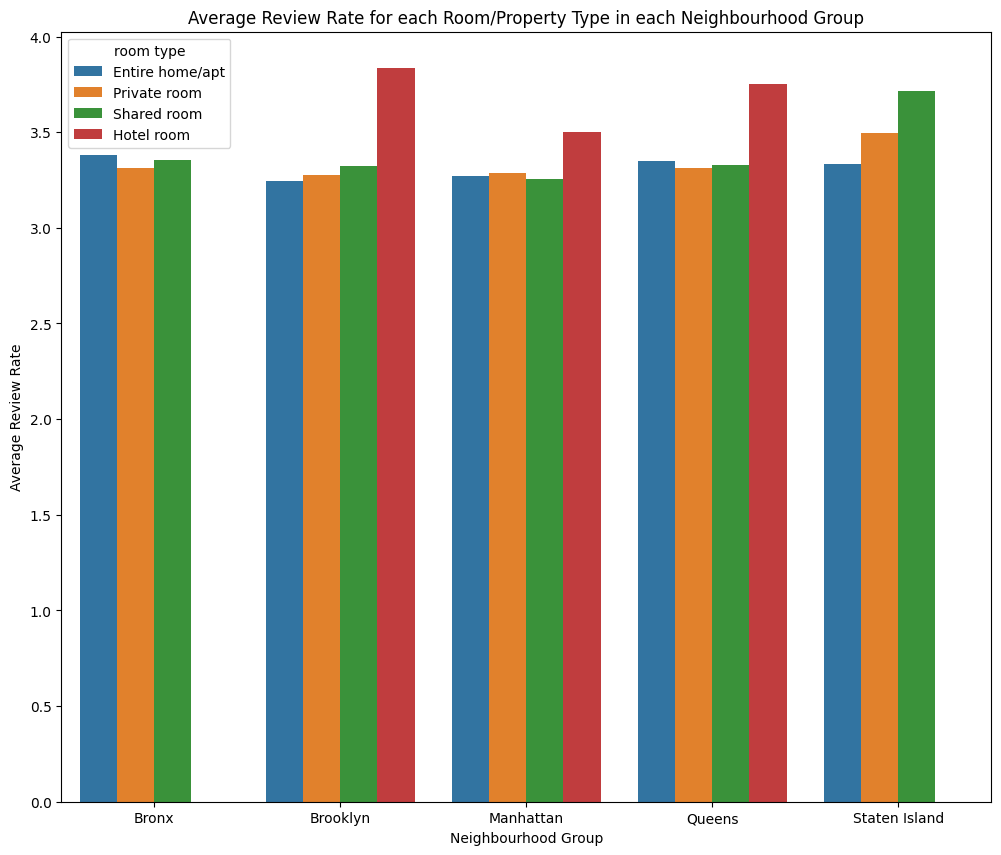

In [ ]:
plt.figure(figsize=(12,10));
sns.barplot(data = ABRN, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group');

### Interpretation: Review Rate Across Categories

The grouped bar chart provides a detailed comparison of average review rates, broken down by both the neighborhood group and room type.

* **Overall Consistency:** The average review rate is consistently high across all neighborhood groups and property types, generally staying within the 3.0 to 4.0 range.
* **Top Performers (Room Type):** The **Shared room** and **Hotel room** categories (where they exist) frequently achieve the highest average review rates in several neighborhoods (e.g., Brooklyn, Manhattan, Queens, Staten Island).
* **Neighborhood Trends:**
    * **Bronx:** **Shared room** and **Hotel room** lead in review rate.
    * **Brooklyn & Manhattan:** **Shared room** consistently records the highest rate.
    * **Staten Island:** The **Hotel room** category shows the highest average review rate.

This suggests that while the large categories (Entire home/apt and Private room) dominate the volume, the smaller, more niche categories often deliver the highest satisfaction as reflected in the review rate number.

## Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year

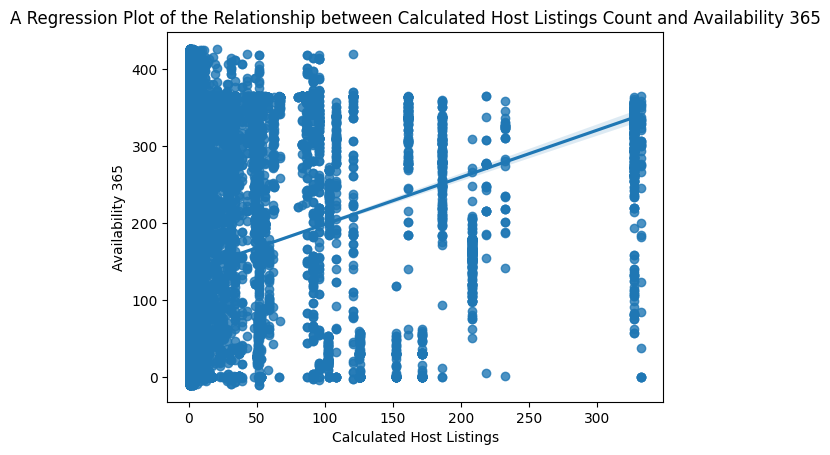

In [ ]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

### Interpretation: Host Listings Count vs. Availability

The regression plot visualizes the relationship between the host's total listing count (representing host size) and their property's yearly availability.

* **Correlation:** The visual scattering of the data points and the underlying correlation coefficient (calculated to be low, around 0.136) indicate a **very weak positive correlation** between the two variables.
* **Finding:** There is **no strong linear relationship**. A host with hundreds of listings is not significantly more or less likely to have high availability than a host with only one listing.
* **Business Insight:** Availability is likely influenced by factors other than just the host's size, such as market demand, pricing strategies, and whether the host actively blocks off dates for personal use, rather than being a predictable function of professional scale.

In [ ]:
df[['calculated host listings count', 'availability 365']].corr()

,calculated host listings count,availability 365
calculated host listings count,1.000000,0.135337
availability 365,0.135337,1.000000


### Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.